# 1. 패키지 및 한글 불러옴

In [ ]:
# 한글 불러옴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
# 런타임 다시 시작

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from google.colab import drive

from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans


# 2. 데이터 가져오기

In [ ]:
violation_type_raw = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/2 단속/27 경찰청 서울특별시경찰청_교통법규 위반 유형별 단속현황_2022.csv',
                 encoding='utf-8')
time_check_raw = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/2 단속/23 경찰청_음주운전 시간대별 단속통계_20201031.csv',
                 encoding='euc-kr')
method_check_raw = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/2 단속/24 경찰청_측정방법별 음주운전 단속현황_20211231.csv',
                 encoding='euc-kr')
caught_person_raw = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/2 단속/25 경찰청_음주운전 걸린 사람 신상정보_2022.csv',
                 encoding='euc-kr')
age_check_raw = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/2 단속/26 경찰청_연령별 음주운전 적발기록 현황_2021.csv',
                 encoding='euc-kr')


## 1) 음주운전 시간대별 단속통계

In [ ]:
time_check_raw.head()

,구분,00~01시,02~03시,04~05시,06~07시,08~09시,10~11시,12~13시,14~15시,16~17시,18~19시,20~21시,22~23시
0,2020-01,1642,987,731,601,341,235,192,307,285,411,1320,2371
1,2020-02,1399,1018,672,444,236,130,125,178,254,423,728,1357
2,2020-03,1780,1138,735,462,213,144,144,224,317,562,1130,2074
3,2020-04,1838,1221,717,441,274,155,180,271,345,591,1509,2565
4,2020-05,1946,1296,807,488,304,194,200,291,341,488,1544,2459


In [ ]:
# 데이터 처리

# 첫번째 열 제거
time_check_proc = time_check_raw.drop(time_check_raw.columns[0], axis=1)

# 숫자형으로 변환할 열 선택
columns_to_convert = time_check_proc.columns
# 각 열을 숫자형으로 변환
time_check_proc[columns_to_convert] = time_check_proc[columns_to_convert].astype(int)
time_check_proc.describe(include='all')

,00~01시,02~03시,04~05시,06~07시,08~09시,10~11시,12~13시,14~15시,16~17시,18~19시,20~21시,22~23시
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,1867.600000,1188.200000,756.400000,488.70000,287.700000,181.70000,192.70000,271.700000,345.20000,521.700000,1418.600000,2400.800000
std,216.741628,136.242268,83.138706,55.15443,51.903864,40.27144,35.59666,41.742731,52.79899,74.215976,308.828323,433.175048
min,1399.000000,987.000000,612.000000,420.00000,213.000000,130.00000,125.00000,178.000000,254.00000,411.000000,728.000000,1357.000000
25%,1794.500000,1090.750000,720.500000,448.50000,246.750000,152.00000,183.00000,266.500000,318.00000,456.500000,1331.000000,2300.500000
50%,1943.000000,1201.000000,743.500000,478.00000,289.000000,172.50000,200.50000,284.500000,343.00000,547.500000,1517.500000,2512.000000
75%,1979.250000,1277.250000,804.750000,520.75000,316.500000,208.25000,208.00000,294.000000,387.50000,583.000000,1557.500000,2707.000000
max,2160.000000,1394.000000,897.000000,601.00000,380.000000,250.00000,242.00000,317.000000,418.00000,611.000000,1814.000000,2808.000000


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

# time_check_raw 데이터프레임에서 숫자형 데이터만 선택하여 유클리디안 거리 계산
numeric_data = time_check_proc.select_dtypes(include=['number'])
distances = euclidean_distances(numeric_data)

# 결과 출력
print("행 간 유사도 (유클리디안 거리):")
distances


행 간 유사도 (유클리디안 거리):


array([[   0.        , 1229.26197371,  493.12675855,  490.56498041,
         526.11500644,  540.4562887 ,  809.15449699,  614.02687238,
         778.04884165,  739.42207162],
       [1229.26197371,    0.        ,  930.61216412, 1534.74330101,
        1521.78250746, 1611.44469344, 1854.7565878 , 1375.6983681 ,
        1876.22839761, 1864.94772045],
       [ 493.12675855,  930.61216412,    0.        ,  636.16978866,
         634.39656367,  712.76012795,  950.37624129,  520.23552359,
        1002.71232166,  958.47222182],
       [ 490.56498041, 1534.74330101,  636.16978866,    0.        ,
         232.17450334,  220.33383762,  469.10020252,  453.9526407 ,
         428.95687429,  348.65885906],
       [ 526.11500644, 1521.78250746,  634.39656367,  232.17450334,
           0.        ,  187.08821449,  388.63864965,  310.28696395,
         526.61276095,  415.8244822 ],
       [ 540.4562887 , 1611.44469344,  712.76012795,  220.33383762,
         187.08821449,    0.        ,  353.83894641,  452

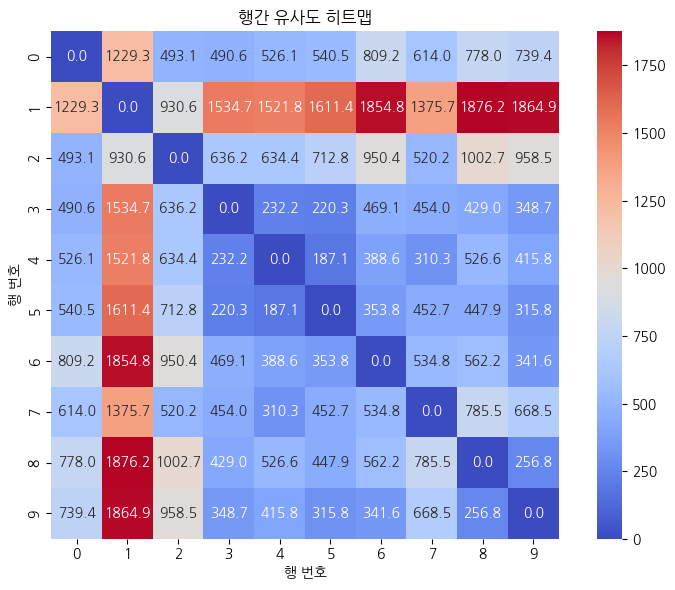

In [ ]:
# 히트맵 그리기
plt.figure(figsize=(8, 6))

#plt.imshow(distances, cmap='hot', interpolation='nearest')
sns.heatmap(distances, annot=True, fmt=".1f", cmap='coolwarm', cbar=True, square=True)

# annot=True: 숫자 표기, fmt=".1f": 소수점 첫째자리, cbar=True, square=True
plt.title('행간 유사도 히트맵')
plt.xlabel('행 번호')
plt.ylabel('행 번호')
plt.tight_layout()
plt.show()

# 결과 1행이 (두번째 행이) 다른 행과 다른 차이가 있음을 확인: 2월에 다른 달보다 유독 단속량이 적음

In [ ]:
# pandas의 corr 함수를 사용하여 피어슨 상관 계수 계산
correlation_matrix = time_check_proc.corr(method='pearson')

print(correlation_matrix)

          00~01시    02~03시    04~05시    06~07시    08~09시    10~11시    12~13시  \
00~01시  1.000000  0.792724  0.615722  0.121452  0.480266  0.472753  0.744796   
02~03시  0.792724  1.000000  0.813103  0.144754  0.459475  0.358537  0.415635   
04~05시  0.615722  0.813103  1.000000  0.556158  0.699210  0.572999  0.204962   
06~07시  0.121452  0.144754  0.556158  1.000000  0.786938  0.803693  0.193896   
08~09시  0.480266  0.459475  0.699210  0.786938  1.000000  0.903409  0.413094   
10~11시  0.472753  0.358537  0.572999  0.803693  0.903409  1.000000  0.506140   
12~13시  0.744796  0.415635  0.204962  0.193896  0.413094  0.506140  1.000000   
14~15시  0.641017  0.199703  0.169053  0.301009  0.484787  0.575708  0.852987   
16~17시  0.824631  0.567161  0.186834 -0.073769  0.263807  0.328041  0.808834   
18~19시  0.551531  0.368305 -0.095689 -0.386886 -0.105337 -0.055983  0.386099   
20~21시  0.800696  0.365092  0.135739 -0.018116  0.334773  0.354524  0.853279   
22~23시  0.825080  0.389651  0.263998  0.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


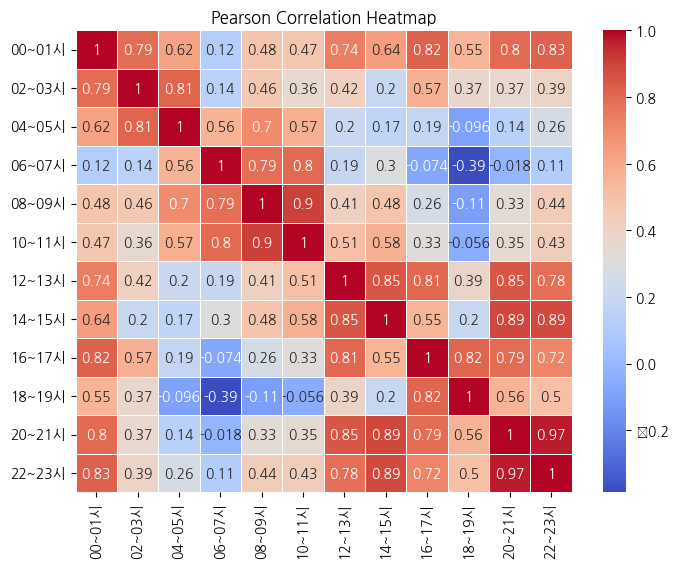

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()
# 양의 상관:빨간, 음의 상관: 파랑
# 가장 큰 음의 상관 : 06시와 18시
# 가장 큰 양의 상관 20시와 22시, 08시와 10시

          Mean
00~01시  1867.6
02~03시  1188.2
04~05시   756.4
06~07시   488.7
08~09시   287.7
10~11시   181.7
12~13시   192.7
14~15시   271.7
16~17시   345.2
18~19시   521.7
20~21시  1418.6
22~23시  2400.8


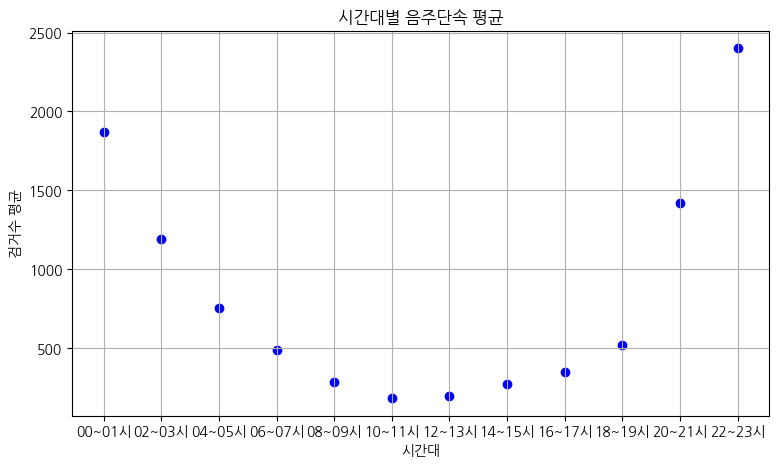

In [ ]:
# 각 열의 평균 계산
column_means = time_check_proc.mean()

# 새로운 데이터 프레임으로 저장
means_df = pd.DataFrame(column_means, columns=['Mean'])

# 새로운 데이터 프레임 출력
print(means_df)

# 평균값 산점도로 시각화
plt.figure(figsize=(9, 5))
plt.scatter(means_df.index, means_df['Mean'], color='blue')
plt.xlabel('시간대')
plt.ylabel('검거수 평균')
plt.title('시간대별 음주단속 평균')
plt.grid(True)
plt.show()

In [ ]:

# 각 열의 평균 계산
column_means = column_means.values.reshape(-1, 1)

# K-means 클러스터링 수행
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(column_means)
clusters = kmeans.labels_

# 각 클러스터에 속하는 열 이름 출력
clustered_columns = pd.DataFrame({'Column': time_check_proc.columns, 'Cluster': clusters})

# 클러스터별로 그룹화
grouped_columns = clustered_columns.groupby('Cluster')['Column'].apply(list)

# 그룹별 열 이름 출력
for cluster, columns in grouped_columns.items():
    print(f"Cluster {cluster + 1}: {columns}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1: ['04~05시', '06~07시', '08~09시', '10~11시', '12~13시', '14~15시', '16~17시', '18~19시']
Cluster 2: ['22~23시']
Cluster 3: ['00~01시']
Cluster 4: ['02~03시', '20~21시']


##2) 측정방법별 음주운전 단속

In [ ]:
method_check_raw.describe()

,호흡측정,채혈,측정거부,기타
count,18.000000,18.000000,18.000000,18.000000
mean,5668.722222,358.944444,238.222222,29.000000
std,4710.743601,364.887488,174.510258,29.077988
min,443.000000,38.000000,21.000000,3.000000
25%,3634.500000,199.250000,139.500000,12.500000
50%,4618.000000,289.500000,188.000000,22.500000
75%,6109.250000,349.500000,297.500000,29.000000
max,22048.000000,1713.000000,786.000000,123.000000


In [ ]:
method_check_raw.head()

,구분,호흡측정,채혈,측정거부,기타
0,서울경찰청,11214,679,427,77
1,부산경찰청,4408,318,189,22
2,대구경찰청,4828,171,174,11
3,인천경찰청,5553,303,153,43
4,광주경찰청,3737,225,135,3


In [ ]:
# 서울경찰청의 각 열의 총합 계산
seoul_police_sums = method_check_raw.loc[method_check_raw['구분'] == '서울경찰청', ['호흡측정', '채혈', '측정거부', '기타']].sum()

# 전체 데이터의 총합 계산
total_sums = method_check_raw[['호흡측정', '채혈', '측정거부', '기타']].sum()

# 서울경찰청의 비율 계산
seoul_police_percentage = (seoul_police_sums / total_sums) * 100

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    '호흡측정': [seoul_police_sums['호흡측정'], total_sums['호흡측정'], seoul_police_percentage['호흡측정']],
    '채혈': [seoul_police_sums['채혈'], total_sums['채혈'], seoul_police_percentage['채혈']],
    '측정거부': [seoul_police_sums['측정거부'], total_sums['측정거부'], seoul_police_percentage['측정거부']],
    '기타': [seoul_police_sums['기타'], total_sums['기타'], seoul_police_percentage['기타']]
}, index=['서울경찰청', '전체 총합', '서울경찰청 비율'])

# 소수점 첫째 자리까지 표시
result_df = result_df.round(1)

result_df

,호흡측정,채혈,측정거부,기타
서울경찰청,11214.0,679.0,427.0,77.0
전체 총합,102037.0,6461.0,4288.0,522.0
서울경찰청 비율,11.0,10.5,10.0,14.8


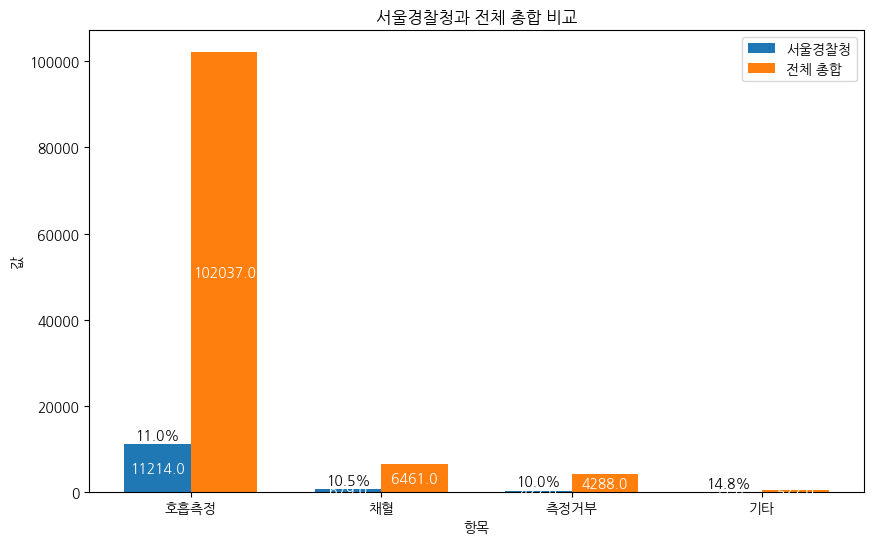

In [ ]:
# 막대 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 서울경찰청과 전체 총합에 대한 막대 그래프 생성
bar_width = 0.35
index = np.arange(len(result_df.columns))

bar1 = ax.bar(index, result_df.loc['서울경찰청'], bar_width, label='서울경찰청')
bar2 = ax.bar(index + bar_width, result_df.loc['전체 총합'], bar_width, label='전체 총합')

# 막대 안에 숫자값 표시
for i in range(len(result_df.columns)):
    ax.text(i, result_df.loc['서울경찰청'][i] / 2, f"{result_df.loc['서울경찰청'][i]}", ha='center', va='center', color='white')
    ax.text(i + bar_width, result_df.loc['전체 총합'][i] / 2, f"{result_df.loc['전체 총합'][i]}", ha='center', va='center', color='white')

# 서울경찰청 비율 값을 막대 위에 표기
for i in range(len(result_df.columns)):
    ax.text(i, result_df.loc['서울경찰청'][i] + 500, f"{result_df.loc['서울경찰청 비율'][i]}%", ha='center', va='bottom')

# 그래프 설정
ax.set_xlabel('항목')
ax.set_ylabel('값')
ax.set_title('서울경찰청과 전체 총합 비교')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(result_df.columns)
ax.legend()

plt.show()

##3) 음주운전 걸린 사람 신상정보

경찰서 지역

In [ ]:
caught_person_raw.head()

,성별,적발횟수,나이,알콜농도,측정일시,관할경찰서
0,남자,1,43,0.217,2022/01/01 00:02:00,음성경찰서
1,남자,1,43,0.097,2022/01/01 00:02:00,대전둔산경찰서
2,남자,1,27,0.128,2022/01/01 00:04:00,서울마포경찰서
3,남자,1,28,0.186,2022/01/01 00:05:00,홍천경찰서
4,남자,1,44,0.061,2022/01/01 00:05:00,분당경찰서


In [ ]:
caught_person_raw.tail()
# 2022년 1월부터 12월까지 1년 전국 데이터

,성별,적발횟수,나이,알콜농도,측정일시,관할경찰서
127519,남자,1,29,0.101,2022/12/31 23:54:00,아산경찰서
127520,남자,1,25,0.185,2022/12/31 23:55:00,부산동래경찰서
127521,남자,1,49,0.072,2022/12/31 23:55:00,예산경찰서
127522,남자,1,55,0.123,2022/12/31 23:56:00,인천연수경찰서
127523,여자,1,37,0.077,2022/12/31 23:57:00,파주경찰서


In [ ]:
# 결측치 확인
print(caught_person_raw.isnull().sum()) # 결측치 없음

# 데이터프레임의 크기 확인
print(caught_person_raw.shape) # 약 12만개

# 데이터 열 확인
caught_person_raw.describe(include='all') # 나이, 알콜농도에 문자값이 포함되어있음.

성별       0
적발횟수     0
나이       0
알콜농도     0
측정일시     0
관할경찰서    0
dtype: int64
(127524, 6)


,성별,적발횟수,나이,알콜농도,측정일시,관할경찰서
count,127524,127524.000000,127524,127524,127524,127524
unique,3,NaN,80,391,99893,265
top,남자,NaN,30,측정거부,2022/03/04 22:25:00,평택경찰서
freq,112826,NaN,3757,4593,7,3910
mean,NaN,1.019996,NaN,NaN,NaN,NaN
std,NaN,0.154931,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN


In [ ]:
# '서울'을 포함하는 값들
contains_seoul = caught_person_raw[caught_person_raw['관할경찰서'].str.contains('서울')]['관할경찰서'].unique()

# '서울'을 포함하지 않는 값들
not_contains_seoul = caught_person_raw[~caught_person_raw['관할경찰서'].str.contains('서울')]['관할경찰서'].unique()

print("Contains '서울':", contains_seoul)
print("Does not contain '서울':", not_contains_seoul)
len(contains_seoul)

전국 음주단속 신상
성별
남자    88.474326
여자    11.478624
불명     0.047050

연령대
40대       29474
30대       29350
20대       26953
50대       23859
60대        9531
10대        2174
70대        1418
80대 이상      114

평균 알콜농도
성별            남자        여자
연령대                       
10대     0.096665  0.108026
20대     0.115883  0.126086
30대     0.119527  0.128840
40대     0.120185  0.121136
50대     0.119698  0.111717
60대     0.116195  0.106917
70대     0.105045  0.095480
80대 이상  0.091509       NaN

### 서울지역만 따로 분석

In [ ]:
# '서울'을 포함하는 모든 데이터들을 새로운 데이터프레임으로 생성
seoul_raw = caught_person_raw[caught_person_raw['관할경찰서'].str.contains('서울')]

# 결과 출력
print(seoul_raw.head())

    성별  적발횟수  나이   알콜농도                 측정일시    관할경찰서
2   남자     1  27  0.128  2022/01/01 00:04:00  서울마포경찰서
12  남자     1  49  0.092  2022/01/01 00:22:00  서울송파경찰서
31  남자     1  28  0.152  2022/01/01 01:20:00  서울성동경찰서
35  남자     1  37  0.085  2022/01/01 01:30:00  서울마포경찰서
45  남자     1  34  0.078  2022/01/01 01:39:00  서울용산경찰서


In [ ]:
# 관할경찰서 별로 그룹화하여 각 그룹의 행 개수 세기
grouped_df = seoul_raw.groupby('관할경찰서').size().reset_index(name='count')

# 결과 출력
print(grouped_df)

file_path = '/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/0서울경찰서별 단속된 횟수.csv'
grouped_df.to_csv(file_path, index=False)



       관할경찰서  count
0    서울강남경찰서   1500
1    서울강동경찰서    524
2    서울강북경찰서    545
3    서울강서경찰서    893
4    서울관악경찰서    703
5    서울광진경찰서    568
6    서울구로경찰서    445
7    서울금천경찰서    341
8   서울남대문경찰서    107
9    서울노원경찰서    521
10   서울도봉경찰서    255
11  서울동대문경찰서    420
12   서울동작경찰서    450
13   서울마포경찰서    965
14   서울방배경찰서    290
15  서울서대문경찰서    330
16   서울서부경찰서    244
17   서울서초경찰서    623
18   서울성동경찰서    434
19   서울성북경찰서    221
20   서울송파경찰서   1196
21   서울수서경찰서    498
22   서울양천경찰서    415
23  서울영등포경찰서    972
24   서울용산경찰서    564
25   서울은평경찰서    210
26   서울종로경찰서    189
27   서울종암경찰서    321
28   서울중랑경찰서    433
29   서울중부경찰서    192
30   서울혜화경찰서    142


In [ ]:
seoul_raw.describe(include='all')

,성별,적발횟수,나이,알콜농도,측정일시,관할경찰서
count,15511,15511.000000,15511,15511,15511,15511
unique,3,NaN,71,304,15006,31
top,남자,NaN,30,측정거부,2022/07/07 03:50:00,서울강남경찰서
freq,13850,NaN,608,568,4,1500
mean,NaN,1.019792,NaN,NaN,NaN,NaN
std,NaN,0.159973,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN


In [ ]:
# 나이 열을 숫자로 변환할 수 없는 값을 NaN으로 설정
seoul_raw['나이_numeric'] = pd.to_numeric(seoul_raw['나이'], errors='coerce')

# NaN 값을 세기
non_numeric_ages = seoul_raw['나이_numeric'].isna().sum()


<ipython-input-80-df1a0861ff2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_raw['나이_numeric'] = pd.to_numeric(seoul_raw['나이'], errors='coerce')


In [ ]:
# NaN 값을 나이 열의 평균으로 대체
mean_age = seoul_raw['나이_numeric'].mean()
seoul_raw['나이_numeric'].fillna(mean_age, inplace=True)

# 나이_numeric 열을 나이 열로 다시 대체
seoul_raw['나이'] = seoul_raw['나이_numeric']
seoul_raw.drop(columns=['나이_numeric'], inplace=True)

seoul_raw

<ipython-input-84-2b5e43b73515>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_raw['나이_numeric'].fillna(mean_age, inplace=True)
<ipython-input-84-2b5e43b73515>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_raw['나이'] = seoul_raw['나이_numeric']
<ipython-input-84-2b5e43b73515>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_raw.drop(columns=['나이_numeric'], inp

,성별,적발횟수,나이,알콜농도,측정일시,관할경찰서
2,남자,1,27.0,0.128,2022/01/01 00:04:00,서울마포경찰서
12,남자,1,49.0,0.092,2022/01/01 00:22:00,서울송파경찰서
31,남자,1,28.0,0.152,2022/01/01 01:20:00,서울성동경찰서
35,남자,1,37.0,0.085,2022/01/01 01:30:00,서울마포경찰서
45,남자,1,34.0,0.078,2022/01/01 01:39:00,서울용산경찰서
...,...,...,...,...,...,...
127410,남자,1,63.0,0.059,2022/12/31 18:07:00,서울강동경찰서
127424,남자,1,62.0,0.183,2022/12/31 19:26:00,서울강서경찰서
127444,남자,1,60.0,0.078,2022/12/31 20:52:00,서울영등포경찰서
127451,남자,1,41.0,0.139,2022/12/31 21:16:00,서울마포경찰서


In [ ]:
# 성별이 '불명'인 데이터 필터링
seoul_raw[seoul_raw['성별'] == '불명']
# 1명 나옴

# 성별이 '불명'인 값을 '남자'로 변경
seoul_raw.loc[seoul_raw['성별'] == '불명', '성별'] = '남자'
seoul_raw[seoul_raw['성별'] == '불명']

,성별,적발횟수,나이,알콜농도,측정일시,관할경찰서


In [ ]:
# 알콜농도 열을 숫자로 변환할 수 없는 값을 NaN으로 설정
seoul_raw['알콜농도_numeric'] = pd.to_numeric(seoul_raw['알콜농도'], errors='coerce')

# NaN 값을 세기
non_numeric_alcohol = seoul_raw['알콜농도_numeric'].isna().sum()
non_numeric_alcohol

<ipython-input-89-3e04ffdf436d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_raw['알콜농도_numeric'] = pd.to_numeric(seoul_raw['알콜농도'], errors='coerce')


In [ ]:
non_numeric_alcohol

568

In [ ]:
# 568개 결측치 평균으로 대체

# 알콜농도 열을 숫자로 변환할 수 없는 값을 NaN으로 설정
seoul_raw['알콜농도_numeric'] = pd.to_numeric(seoul_raw['알콜농도'], errors='coerce')

# 알콜농도_numeric 열의 평균 계산
mean_alcohol = seoul_raw['알콜농도_numeric'].mean()

# NaN 값을 평균으로 대체
seoul_raw['알콜농도_numeric'].fillna(mean_alcohol, inplace=True)

# 결과 출력
print(f"비정상적인 값 대체 후 데이터프레임:\n{seoul_raw}")


비정상적인 값 대체 후 데이터프레임:
        성별  적발횟수    나이   알콜농도                 측정일시     관할경찰서  알콜농도_numeric
2       남자     1  27.0  0.128  2022/01/01 00:04:00   서울마포경찰서         0.128
12      남자     1  49.0  0.092  2022/01/01 00:22:00   서울송파경찰서         0.092
31      남자     1  28.0  0.152  2022/01/01 01:20:00   서울성동경찰서         0.152
35      남자     1  37.0  0.085  2022/01/01 01:30:00   서울마포경찰서         0.085
45      남자     1  34.0  0.078  2022/01/01 01:39:00   서울용산경찰서         0.078
...     ..   ...   ...    ...                  ...       ...           ...
127410  남자     1  63.0  0.059  2022/12/31 18:07:00   서울강동경찰서         0.059
127424  남자     1  62.0  0.183  2022/12/31 19:26:00   서울강서경찰서         0.183
127444  남자     1  60.0  0.078  2022/12/31 20:52:00  서울영등포경찰서         0.078
127451  남자     1  41.0  0.139  2022/12/31 21:16:00   서울마포경찰서         0.139
127471  남자     2  62.0  0.159  2022/12/31 22:11:00   서울용산경찰서         0.159

[15511 rows x 7 columns]


<ipython-input-91-aa50caf8df20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_raw['알콜농도_numeric'] = pd.to_numeric(seoul_raw['알콜농도'], errors='coerce')
<ipython-input-91-aa50caf8df20>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_raw['알콜농도_numeric'].fillna(mean_alcohol, inplace=True)


In [ ]:
# numeric 열을 알콜농도 열로 다시 대체
seoul_raw['알콜농도'] = seoul_raw['알콜농도_numeric']
seoul_raw.drop(columns=['알콜농도_numeric'], inplace=True)
seoul_raw.head()

<ipython-input-92-9292bffebb48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_raw['알콜농도'] = seoul_raw['알콜농도_numeric']
<ipython-input-92-9292bffebb48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_raw.drop(columns=['알콜농도_numeric'], inplace=True)


,성별,적발횟수,나이,알콜농도,측정일시,관할경찰서
2,남자,1,27.0,0.128,2022/01/01 00:04:00,서울마포경찰서
12,남자,1,49.0,0.092,2022/01/01 00:22:00,서울송파경찰서
31,남자,1,28.0,0.152,2022/01/01 01:20:00,서울성동경찰서
35,남자,1,37.0,0.085,2022/01/01 01:30:00,서울마포경찰서
45,남자,1,34.0,0.078,2022/01/01 01:39:00,서울용산경찰서


In [ ]:
# 측정일시가 유효한 날짜 형식인지 확인하고 필터링
seoul_raw['측정일시'] = pd.to_datetime(seoul_raw['측정일시'], errors='coerce')
invalid_dates = seoul_raw[seoul_raw['측정일시'].isna()]

print("\n유효하지 않은 측정일시 값들:\n", invalid_dates)

seoul_proc = seoul_raw.dropna(subset=['측정일시'])

print("\n전처리된 데이터:\n", seoul_proc)


유효하지 않은 측정일시 값들:
 Empty DataFrame
Columns: [성별, 적발횟수, 나이, 알콜농도, 측정일시, 관할경찰서]
Index: []

전처리된 데이터:
         성별  적발횟수    나이   알콜농도                측정일시     관할경찰서
2       남자     1  27.0  0.128 2022-01-01 00:04:00   서울마포경찰서
12      남자     1  49.0  0.092 2022-01-01 00:22:00   서울송파경찰서
31      남자     1  28.0  0.152 2022-01-01 01:20:00   서울성동경찰서
35      남자     1  37.0  0.085 2022-01-01 01:30:00   서울마포경찰서
45      남자     1  34.0  0.078 2022-01-01 01:39:00   서울용산경찰서
...     ..   ...   ...    ...                 ...       ...
127410  남자     1  63.0  0.059 2022-12-31 18:07:00   서울강동경찰서
127424  남자     1  62.0  0.183 2022-12-31 19:26:00   서울강서경찰서
127444  남자     1  60.0  0.078 2022-12-31 20:52:00  서울영등포경찰서
127451  남자     1  41.0  0.139 2022-12-31 21:16:00   서울마포경찰서
127471  남자     2  62.0  0.159 2022-12-31 22:11:00   서울용산경찰서

[15511 rows x 6 columns]


<ipython-input-93-aea94c4b7b5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_raw['측정일시'] = pd.to_datetime(seoul_raw['측정일시'], errors='coerce')


In [ ]:
seoul_proc.describe(include='all')

,성별,적발횟수,나이,알콜농도,측정일시,관할경찰서
count,15511,15511.000000,15511.000000,15511.000000,15511,15511
unique,2,NaN,NaN,NaN,NaN,31
top,남자,NaN,NaN,NaN,NaN,서울강남경찰서
freq,13851,NaN,NaN,NaN,NaN,1500
mean,NaN,1.019792,39.585751,0.124822,2022-07-10 13:03:28.180001536,NaN
min,NaN,1.000000,14.000000,0.030000,2022-01-01 00:04:00,NaN
25%,NaN,1.000000,30.000000,0.083000,2022-04-21 21:34:00,NaN
50%,NaN,1.000000,38.000000,0.124000,2022-07-11 20:44:00,NaN
75%,NaN,1.000000,48.000000,0.158000,2022-10-02 03:22:00,NaN
max,NaN,6.000000,90.000000,0.960000,2022-12-31 22:11:00,NaN


In [ ]:
# 연령대 나누기 및 연령대 열 추가
seoul_proc['연령대'] = pd.cut(seoul_proc['나이'],
                                    bins=[10, 20, 30, 40, 50, 60, 70, 80, 90],
                                    labels=['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대 이상'])

print("전처리된 데이터:\n", seoul_proc)


전처리된 데이터:
         성별  적발횟수    나이   알콜농도                측정일시     관할경찰서  연령대
2       남자     1  27.0  0.128 2022-01-01 00:04:00   서울마포경찰서  20대
12      남자     1  49.0  0.092 2022-01-01 00:22:00   서울송파경찰서  40대
31      남자     1  28.0  0.152 2022-01-01 01:20:00   서울성동경찰서  20대
35      남자     1  37.0  0.085 2022-01-01 01:30:00   서울마포경찰서  30대
45      남자     1  34.0  0.078 2022-01-01 01:39:00   서울용산경찰서  30대
...     ..   ...   ...    ...                 ...       ...  ...
127410  남자     1  63.0  0.059 2022-12-31 18:07:00   서울강동경찰서  60대
127424  남자     1  62.0  0.183 2022-12-31 19:26:00   서울강서경찰서  60대
127444  남자     1  60.0  0.078 2022-12-31 20:52:00  서울영등포경찰서  50대
127451  남자     1  41.0  0.139 2022-12-31 21:16:00   서울마포경찰서  40대
127471  남자     2  62.0  0.159 2022-12-31 22:11:00   서울용산경찰서  60대

[15511 rows x 7 columns]


In [ ]:
# 날짜
seoul_proc['측정일'] = seoul_proc['측정일시'].dt.date

# 월별
seoul_proc['측정월'] = seoul_proc['측정일시'].dt.month

# 요일별
seoul_proc['측정요일'] = seoul_proc['측정일시'].dt.day_name()

# 시간별
seoul_proc['측정시간'] = seoul_proc['측정일시'].dt.hour

seoul_proc.head()


,성별,적발횟수,나이,알콜농도,측정일시,관할경찰서,연령대,측정일,측정월,측정요일,측정시간
2,남자,1,27.0,0.128,2022-01-01 00:04:00,서울마포경찰서,20대,2022-01-01,1,Saturday,0
12,남자,1,49.0,0.092,2022-01-01 00:22:00,서울송파경찰서,40대,2022-01-01,1,Saturday,0
31,남자,1,28.0,0.152,2022-01-01 01:20:00,서울성동경찰서,20대,2022-01-01,1,Saturday,1
35,남자,1,37.0,0.085,2022-01-01 01:30:00,서울마포경찰서,30대,2022-01-01,1,Saturday,1
45,남자,1,34.0,0.078,2022-01-01 01:39:00,서울용산경찰서,30대,2022-01-01,1,Saturday,1


In [ ]:
file_path = '/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/0서울경찰별 단속신상정보.csv'
seoul_proc.to_csv(file_path, index=False)

In [ ]:
seoul_proc.describe(include='all')

,성별,적발횟수,나이,알콜농도,측정일시,관할경찰서,연령대,측정일,측정월,측정요일,측정시간
count,15511,15511.000000,15511.000000,15511.000000,15511,15511,15511,15511,15511.000000,15511,15511.000000
unique,2,NaN,NaN,NaN,NaN,31,8,365,NaN,7,NaN
top,남자,NaN,NaN,NaN,NaN,서울강남경찰서,30대,2022-06-11,NaN,Saturday,NaN
freq,13851,NaN,NaN,NaN,NaN,1500,4604,86,NaN,2775,NaN
mean,NaN,1.019792,39.585751,0.124822,2022-07-10 13:03:28.180001536,NaN,NaN,NaN,6.787828,NaN,10.709883
min,NaN,1.000000,14.000000,0.030000,2022-01-01 00:04:00,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,NaN,1.000000,30.000000,0.083000,2022-04-21 21:34:00,NaN,NaN,NaN,4.000000,NaN,2.000000
50%,NaN,1.000000,38.000000,0.124000,2022-07-11 20:44:00,NaN,NaN,NaN,7.000000,NaN,7.000000
75%,NaN,1.000000,48.000000,0.158000,2022-10-02 03:22:00,NaN,NaN,NaN,10.000000,NaN,22.000000
max,NaN,6.000000,90.000000,0.960000,2022-12-31 22:11:00,NaN,NaN,NaN,12.000000,NaN,23.000000


### 서울 전처리 끝

## 4) 연령별 음주운전 적발기록

30,40대가 많다. 끝

In [ ]:
age_check_raw.head()

,구분,10대,20대,30대,40대,50대이상
0,2010,1910,59445,93114,94149,53929
1,2011,1693,48217,79594,79279,49394
2,2012,1731,44968,75883,75286,50062
3,2013,1688,46242,83313,81250,57230
4,2014,1773,41857,75954,75451,56640


In [ ]:
age_check_proc = age_check_raw.iloc[-3:]
age_check_proc

,구분,10대,20대,30대,40대,50대이상
8,2018,1304,30372,45015,43097,43239
9,2019,1278,25969,35097,32678,35720
10,2020,1246,22090,28429,29153,36610


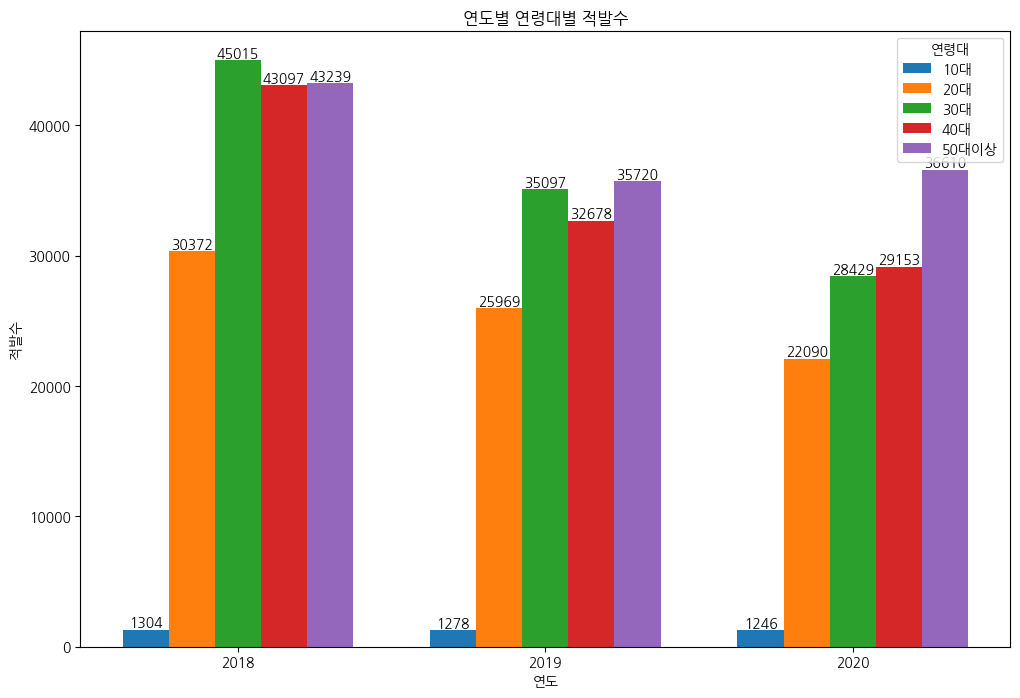

In [ ]:
# 막대그래프 시각화
plt.figure(figsize=(12, 8))

# 연도별로 나누어 각 연령대의 데이터를 막대로 표시
bar_width = 0.15
index = range(len(age_check_proc))

for i, col in enumerate(age_check_proc.columns[1:]):
    plt.bar([p + bar_width * i for p in index], age_check_proc[col], width=bar_width, label=col)

# 각 막대 위에 값 표시
for i, col in enumerate(age_check_proc.columns[1:]):
    for j, value in enumerate(age_check_proc[col]):
        plt.text(j + bar_width * i, value, str(value), ha='center', va='bottom')

# 그래프 설정
plt.xlabel('연도')
plt.ylabel('적발수')
plt.title('연도별 연령대별 적발수')
plt.xticks([p + bar_width * 2 for p in index], age_check_proc['구분'])
plt.legend(title='연령대')
plt.show()

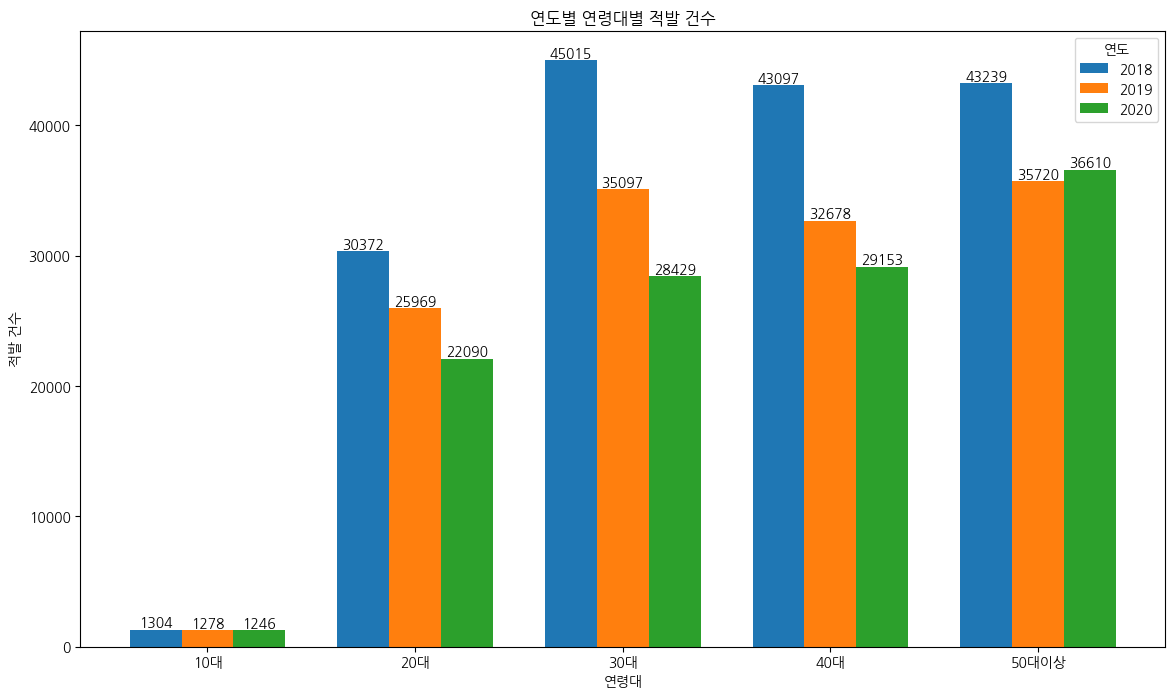

In [ ]:
# 막대그래프 시각화
plt.figure(figsize=(14, 8))

bar_width = 0.25
index = np.arange(len(age_check_proc.columns[1:]))

# 각 연도에 대한 막대 위치 설정
positions = [index + bar_width * i for i in range(len(age_check_proc))]

# 각 연령대별 막대 그래프 그리기
for i, year in enumerate(age_check_proc['구분']):
    plt.bar(positions[i], age_check_proc.iloc[i, 1:], width=bar_width, label=year)

# 각 막대 위에 값 표시
for i, year in enumerate(age_check_proc['구분']):
    for j, value in enumerate(age_check_proc.iloc[i, 1:]):
        plt.text(positions[i][j], value, str(value), ha='center', va='bottom')

# 그래프 설정
plt.xlabel('연령대')
plt.ylabel('적발 건수')
plt.title('연도별 연령대별 적발 건수')
plt.xticks(index + bar_width, age_check_proc.columns[1:])
plt.legend(title='연도')
plt.show()

##5) 교통법규 위반 유형별 단속 현황

서울 구역

In [ ]:
violation_type_raw.head()

,구분,중앙선침범,신호위반,음주운전,무면허운전,속도위반
0,중부,676,20698,196,83,18174
1,종로,700,13657,180,101,50136
2,남대문,406,10451,100,45,6107
3,서대문,1337,42230,306,147,47248
4,혜화,445,11013,140,131,7079


In [ ]:
violation_type_raw.describe(include='all')

,구분,중앙선침범,신호위반,음주운전,무면허운전,속도위반
count,31,31.000000,31.000000,31.000000,31.000000,31.000000
unique,31,NaN,NaN,NaN,NaN,NaN
top,중부,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,1674.161290,32283.129032,475.419355,266.000000,58084.129032
std,NaN,908.977928,18198.444915,305.207118,202.535429,40749.061870
min,NaN,406.000000,10451.000000,100.000000,45.000000,6107.000000
25%,NaN,1173.500000,20259.000000,248.500000,131.000000,28035.000000
50%,NaN,1367.000000,24798.000000,422.000000,210.000000,49194.000000
75%,NaN,2206.000000,42435.500000,542.500000,287.500000,75742.000000


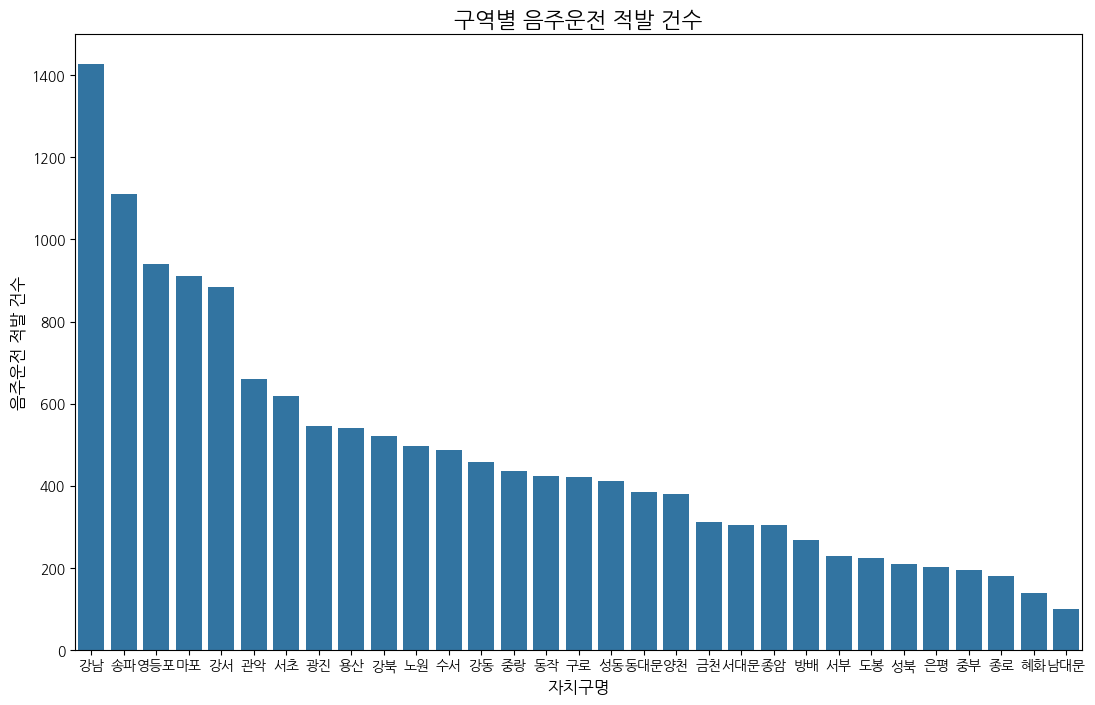

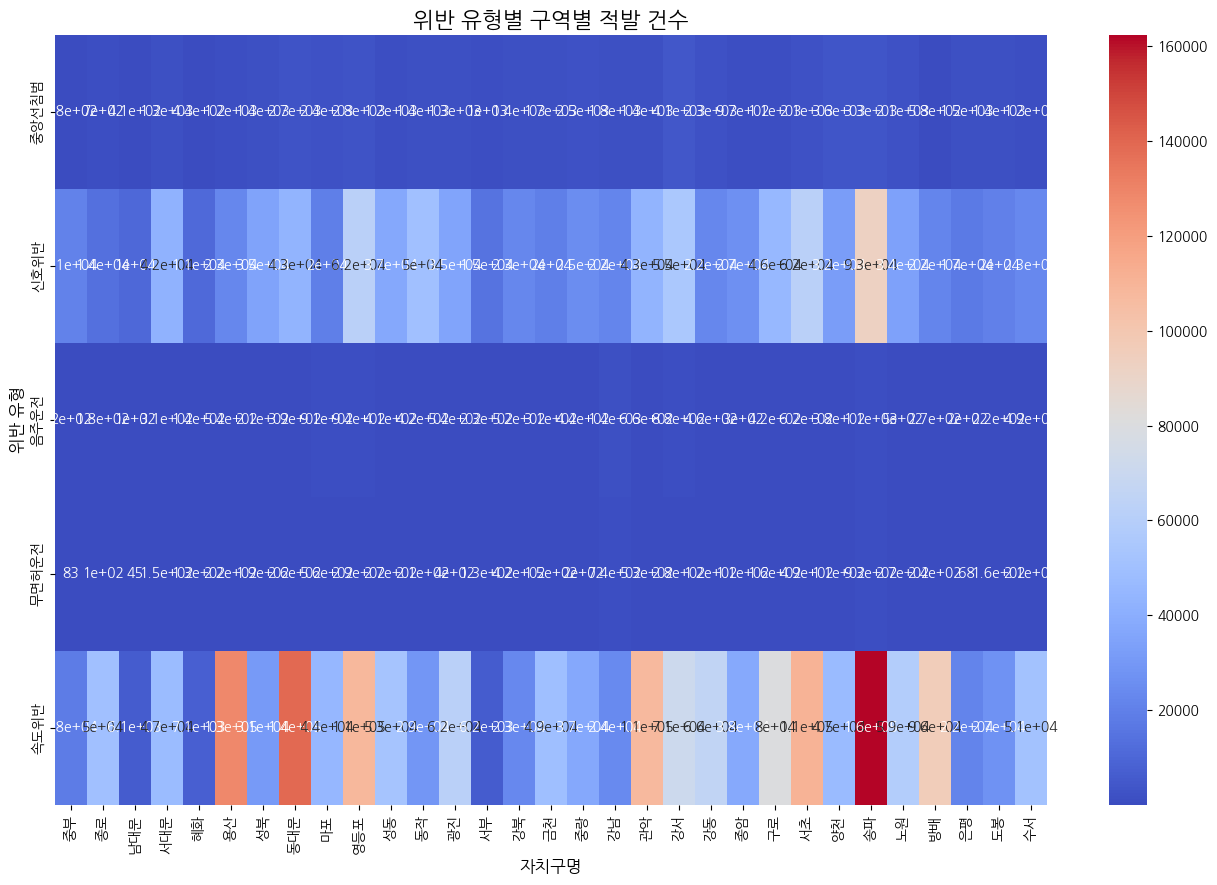

In [ ]:

# 각 구역별 음주운전 적발 건수 시각화
plt.figure(figsize=(13, 8))
sns.barplot(x='구분', y='음주운전', data=sorted_violation)
plt.xlabel('자치구명',fontsize=12)
plt.ylabel('음주운전 적발 건수',fontsize=12)
plt.title('구역별 음주운전 적발 건수',fontsize=16)
plt.show()

# 음주운전과 다른 위반 유형 간의 관계 시각화
plt.figure(figsize=(16, 10))
sns.heatmap(violation_type_raw.set_index('구분').T, annot=True, cmap='coolwarm')
plt.title('위반 유형별 구역별 적발 건수',fontsize=16)
plt.xlabel('자치구명',fontsize=12)
plt.ylabel('위반 유형',fontsize=12)
plt.show()

In [ ]:
# 음주운전 값이 큰 지역
# 음주운전 적발 수가 많은 순서대로 지역 나열
sorted_violation = violation_type_raw[['구분', '음주운전']].sort_values(by='음주운전', ascending=False)

print("음주운전 적발 수가 많은 순서대로 지역:\n", sorted_violation)

음주운전 적발 수가 많은 순서대로 지역:
      구분  음주운전
17   강남  1428
25   송파  1111
9   영등포   941
8    마포   912
19   강서   883
18   관악   661
23   서초   618
12   광진   545
5    용산   540
14   강북   521
26   노원   497
30   수서   488
20   강동   459
16   중랑   436
11   동작   424
22   구로   422
10   성동   413
7   동대문   386
24   양천   380
15   금천   313
3   서대문   306
21   종암   304
27   방배   268
13   서부   229
29   도봉   224
6    성북   210
28   은평   203
0    중부   196
1    종로   180
4    혜화   140
2   남대문   100


In [ ]:
# 음주운전 비율이 큰 지역

# 전체 교통법규 위반 총합 계산
violation_type_raw['총합'] = violation_type_raw[['중앙선침범', '신호위반', '음주운전', '무면허운전', '속도위반']].sum(axis=1)

# 음주운전 비율 계산
violation_type_raw['음주운전 비율'] = violation_type_raw['음주운전'] / violation_type_raw['총합']

# 음주운전 비율이 큰 지역 순서대로 정렬
sorted_violation = violation_type_raw[['구분', '총합', '음주운전', '음주운전 비율']].sort_values(by='음주운전 비율', ascending=False)

print("음주운전 비율이 큰 지역 순서대로:\n", sorted_violation)

# violation_type_proc에 저장
violation_type_proc = sorted_violation


음주운전 비율이 큰 지역 순서대로:
      구분      총합  음주운전   음주운전 비율
17   강남   49234  1428  0.029004
8    마포   67916   912  0.013428
14   강북   48222   521  0.010804
13   서부   22402   229  0.010222
4    혜화   18808   140  0.007444
19   강서  131743   883  0.006702
16   중랑   65261   436  0.006681
30   수서   75801   488  0.006438
2   남대문   17109   100  0.005845
12   광진   99444   545  0.005480
9   영등포  174580   941  0.005390
11   동작   81157   424  0.005224
26   노원   95438   497  0.005208
20   강동   91023   459  0.005043
28   은평   40501   203  0.005012
0    중부   39827   196  0.004921
21   종암   65794   304  0.004620
29   도봉   48607   224  0.004608
24   양천   82574   380  0.004602
10   성동   91682   413  0.004505
15   금천   70979   313  0.004410
18   관악  152993   661  0.004320
25   송파  260883  1111  0.004259
5    용산  153109   540  0.003527
23   서초  175515   618  0.003521
3   서대문   91268   306  0.003353
22   구로  127380   422  0.003313
6    성북   67341   210  0.003118
1    종로   64774   180  0.002779
27   방배  119464   2

In [ ]:
violation_type_proc

file_path = '/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/0지역별 교통법규중 음주운전비율.csv'
violation_type_proc.to_csv(file_path, index=False)